<a href="https://colab.research.google.com/github/JesseChildress/sales-predictions/blob/main/Sales_Predictions_(Project_1_week_6_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [156]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)

In [157]:
df.head() #taking a look at the data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [158]:
#Question 1:
#checking number of rows/columns
df.shape

(8523, 12)

In [159]:
#Questions 1: rows and columns. 8,523 rows, 12 columns.
#Question 2: data types
#datatypes all seem to be in order 
#Question 4: identifying missing data. 1463 missing from Item_Weight, 2410 missing from Outlet_Size
#The columns that are missing data are of type float and object.
#For both columns with missing data, the amount missing is greater than 5%, so we don't want to get rid of that data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [160]:
#Question 3
#checking for duplicates
df.duplicated().sum() # There are no duplicates in this dataset

0

In [161]:
#Question 5: addressing missig data
#Filling in the missing data for Item_Weight
#I am choosing to fill the missing weight values with the mean because that will not change min/max/mean calculations on the data
df.loc[:, 'Item_Weight'].fillna(12.8576, inplace = True) 


In [162]:
#Question 5: addressing missig data
#Filling in missing data for Outlet_Size. 
#I am choosing to add in "Unknown" so that the data is usable.
df.loc[:, 'Outlet_Size'].fillna('Unknown', inplace = True)
#checking for inconsistent categories
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [163]:
#Question 6:
df.info() #confirming that all null values have been filled in 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [164]:
#Question 7: addressing inconsistent categories
#checking for inconsistent categories
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [165]:
#Question 7: addressing inconsistent categories
#checking for inconsistent categories
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [166]:
#Question 7: addressing inconsistent categories
#checking for inconsistent categories
# I don't think I would know even if these were inconsistent. I've just realized I won't need to check for inconsistent categories on all of them, as some are meant to all be differnt
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDX04     9
DRN47     9
NCF42     9
         ..
FDO33     1
DRF48     1
FDY43     1
FDE52     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [167]:
#Question 7: addressing inconsistent categories
#checking for inconsistent categories
#Inconsistencies! I must fix them.
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [168]:
#Question 7: addressing inconsistent categories
#Fixing inconsistencies in Item_Fat_Content	column
df['Item_Fat_Content'].replace(to_replace = 'LF', value = 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'reg', value = 'Regular', inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'low fat', value = 'Low Fat', inplace = True)

In [169]:
#Question 7: addressing inconsistent categories
#making sure that all inconsistencies have been removed
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [170]:
#Question 7: addressing inconsistent categories
#There are no apparent inconsistencies here, the repition of the unique ID's indicates multiple items at the same stores. 
#We can see here that in this entire data set we are only working with items from 10 diffent stores
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [171]:
#Question 7: addressing inconsistent categories. All good
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [172]:
#Question 7: addressing inconsistent categories. All good
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [173]:
#Question 8: summary statistics
df.min() #checking for outliers and weirdness. Only numerical columns have a meaningful min

Item_Identifier                      DRA12
Item_Weight                          4.555
Item_Fat_Content                   Low Fat
Item_Visibility                          0
Item_Type                     Baking Goods
Item_MRP                             31.29
Outlet_Identifier                   OUT010
Outlet_Establishment_Year             1985
Outlet_Size                           High
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                    33.29
dtype: object

In [174]:
#Question 8: summary statistics
df.max() #checking for outliers and weirdness.

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                       Regular
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                               266.888
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Size                            Unknown
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                        13087
dtype: object

In [175]:
#Question 8: summary statistics
df.mean() #only numerical columns return an average.

Item_Weight                    12.857637
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

AxesSubplot(0.125,0.125;0.62x0.755)


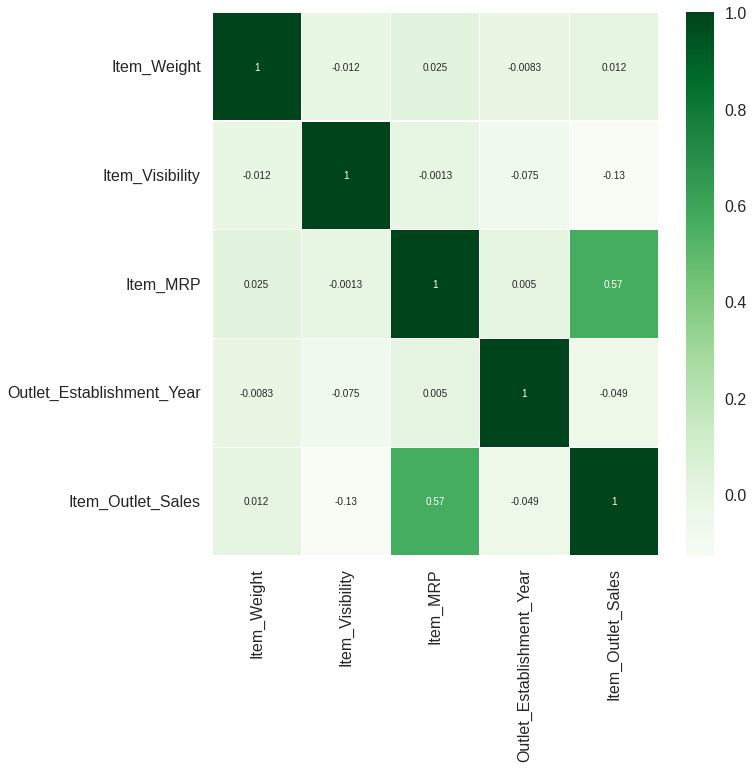

In [176]:
#searching for correlations using heatmap:
#There is mid-to-high positive correlation between maximum retail price and sales for an item.
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10));
plt.xticks(rotation = 45)
print(sns.heatmap(corr, cmap = 'Greens', annot = True, linewidths = .2, ax = ax));


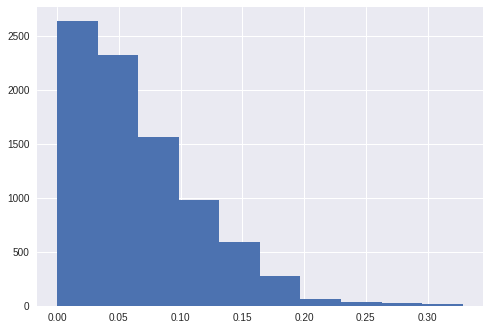

In [177]:
#Histogram of items' visibility
#more items have lower visibility; very few items have 25-30% visinility
plt.style.use('seaborn')
df['Item_Visibility'].hist();

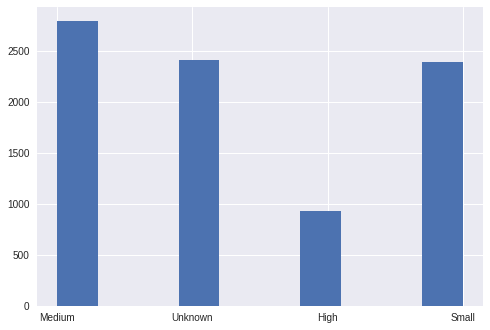

In [178]:
#showing the number of outlets that are different sizes. It looks like most outlets are small to medium, although many are unknown
plt.style.use('seaborn')
df['Outlet_Size'].hist()


Text(0, 0.5, 'Number of Outlets')

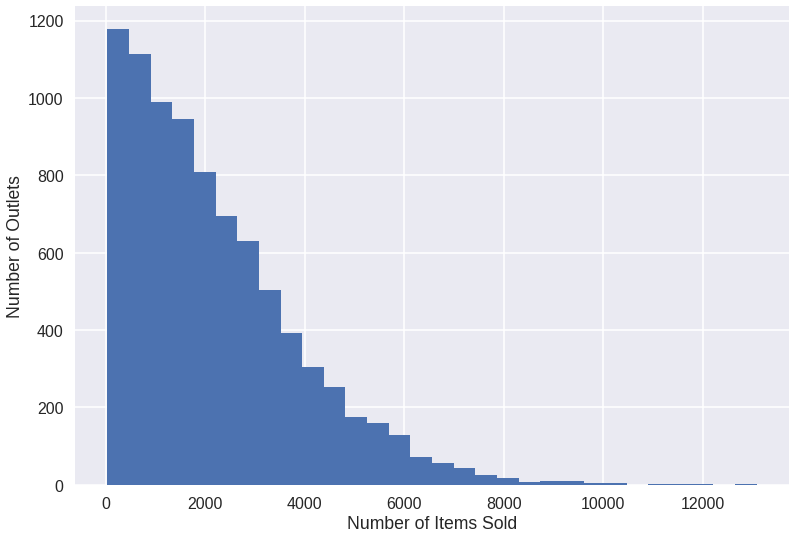

In [179]:
#This shows that there are fewer stores that sell a higher number of items; the majority of outlets have lower sales 
plt.style.use('seaborn-poster')
df['Item_Outlet_Sales'].hist(bins =30);
plt.xlabel('Number of Items Sold')
plt.ylabel('Number of Outlets')

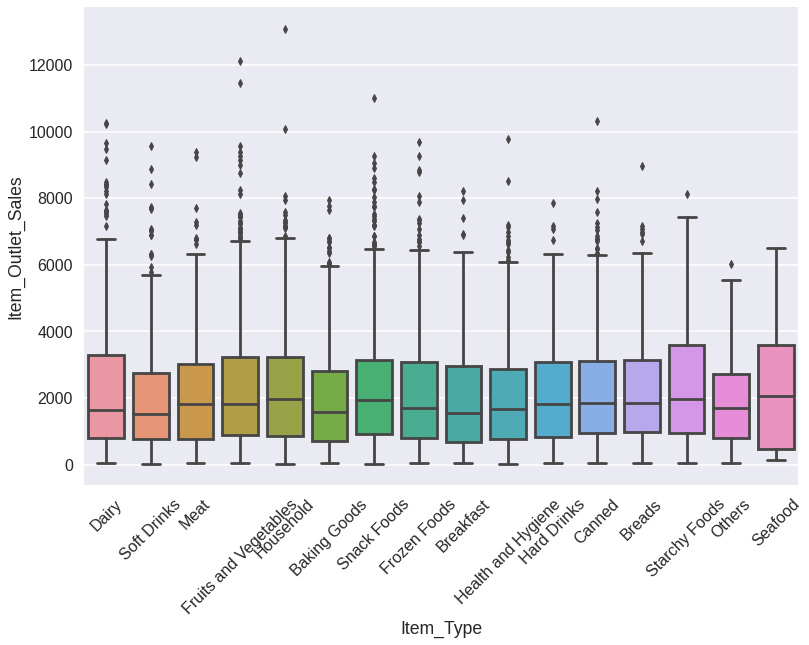

In [180]:
#boxplot to see how much of what types of items are sold by outlet
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x = df['Item_Type'], y = df['Item_Outlet_Sales']);

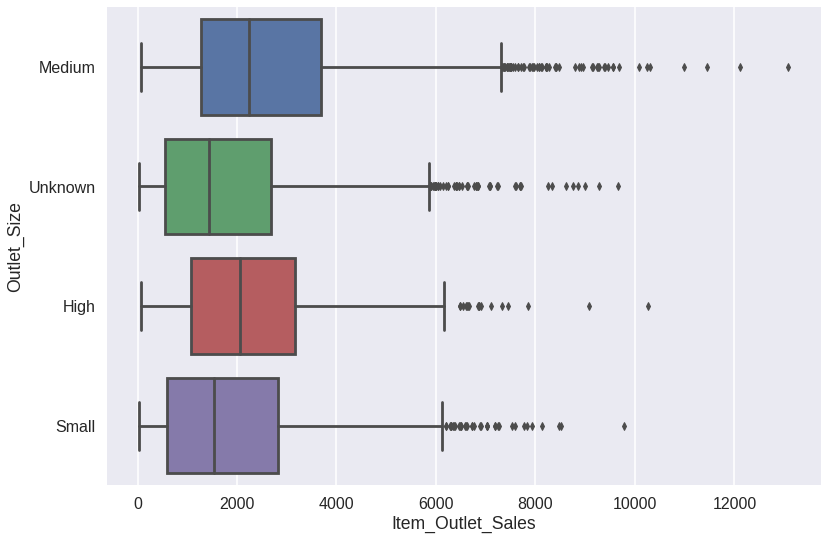

In [181]:
#looking at the various in money made from item sales based on outlet size. It appears that Medium-sized outlets overall have the highest sales.
sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Outlet_Size']);

In [182]:
#A different way to look at the above data- taking the sum of all sales at outlets by size instead of the mean of sales at outlets by size
newdf2 = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index(name = 'Item sales by Outlet')
newdf2

,Outlet_Size,Item sales by Outlet
0,High,2.142664e+06
1,Medium,7.489719e+06
2,Small,4.566212e+06
3,Unknown,4.392531e+06


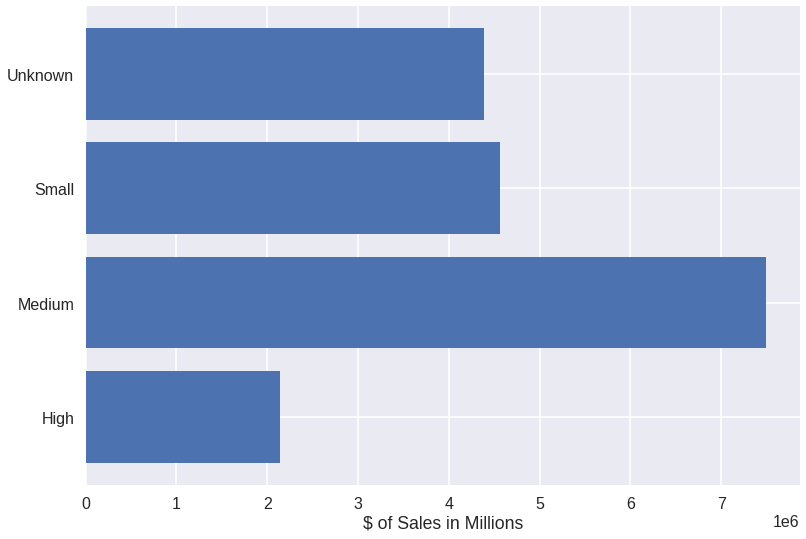

In [183]:
#Medium-sized outlets appear to have the highest dollar-amount of sales
plt.barh(newdf2['Outlet_Size'], newdf2['Item sales by Outlet']);
plt.xlabel('$ of Sales in Millions');
#plt.ticklabel_format(useOffset=False, style='plain') # this line of code caused an error, and I wasn't able to figure out why

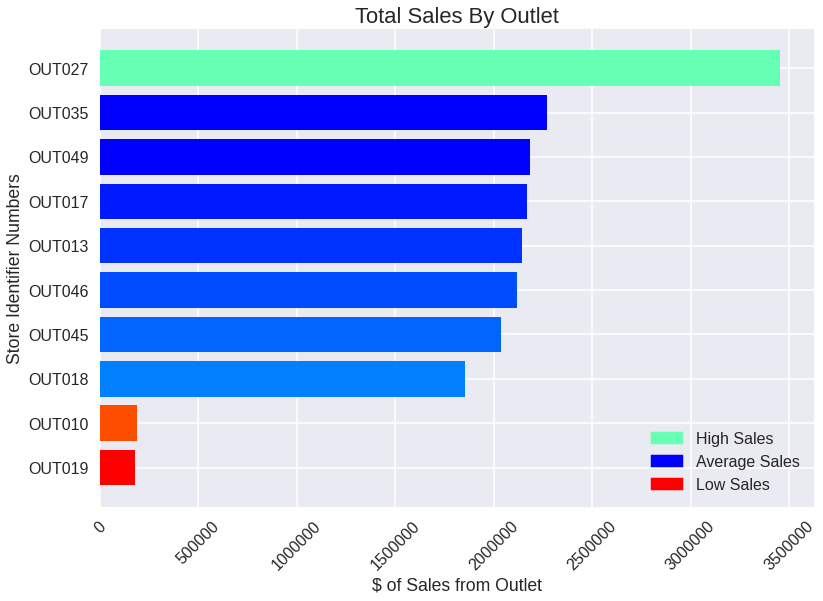

In [184]:
#Week 4: Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
#Data Visualization 1: Total Sales By Outlet
df_sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values().reset_index(name = 'Item sales by Outlet')
plt.barh(df_sales_by_outlet['Outlet_Identifier'], df_sales_by_outlet['Item sales by Outlet'], 
         color = ((1,0,0), (1,.3,0),(0,.5,1),(0,.4,1),(0,.3,1),(0,.2,1),(0,.1,1),(0,0,1), (0,0,1), (0.4,1,0.7)));
plt.title('Total Sales By Outlet', fontsize = 22);
plt.xlabel('$ of Sales from Outlet');
plt.ylabel('Store Identifier Numbers');
plt.xticks(rotation = 45);
colors = {'High Sales':(0.4,1,0.7), 'Average Sales' : 'blue','Low Sales':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

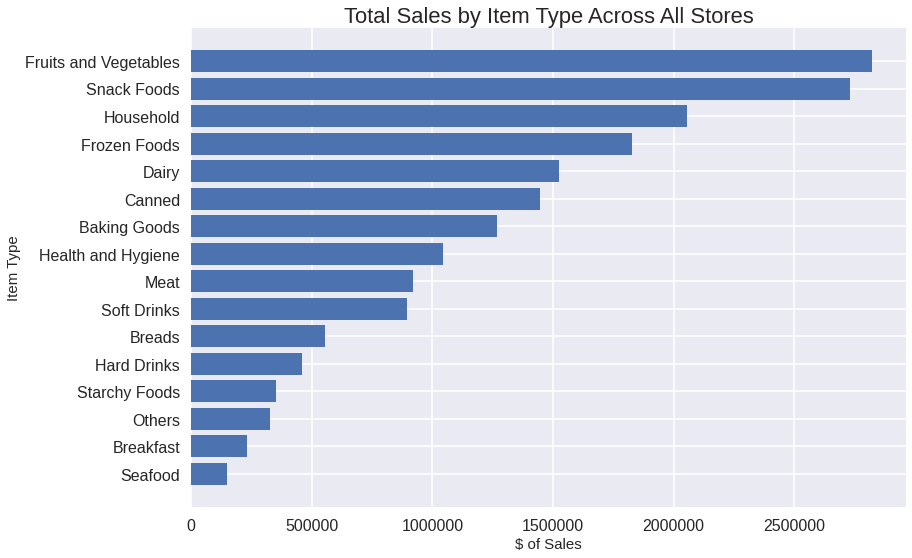

In [185]:
#Data Visualization 2: What types of items make the most money?
df_fat_content = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values().reset_index(name = 'Sales By Item Type')
plt.barh(df_fat_content['Item_Type'].sort_index(), df_fat_content['Sales By Item Type']);
plt.title('Total Sales by Item Type Across All Stores', fontsize = 22)
plt.ylabel('Item Type', fontsize = 15)
plt.xlabel('$ of Sales', fontsize = 15)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

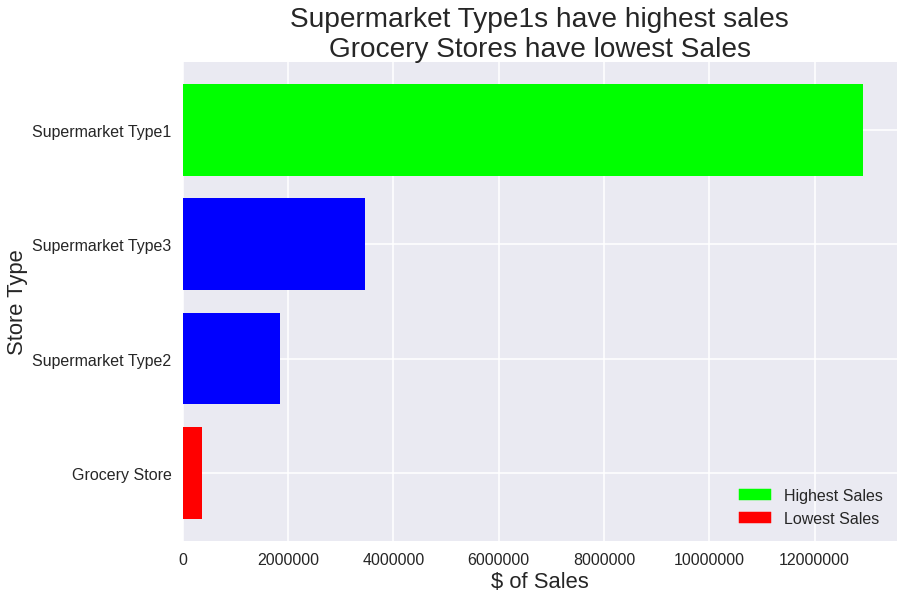

In [186]:
#A better way than the above scatter plot to show that item sales are significantly lower at grocery stores
df_sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values().reset_index(name = 'Sales By Outlet Type')
plt.barh(df_sales_by_outlet_type['Outlet_Type'], df_sales_by_outlet_type['Sales By Outlet Type'],
        color = ((1,0,0), (0,0,1), (0,0,1), (0,1,0)));
colors = {'Highest Sales':(0,1,0), 'Lowest Sales':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);     
plt.title('Supermarket Type1s have highest sales\nGrocery Stores have lowest Sales', fontsize=28)
plt.ylabel('Store Type', fontsize = 22)
plt.xlabel('$ of Sales', fontsize = 22)   
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


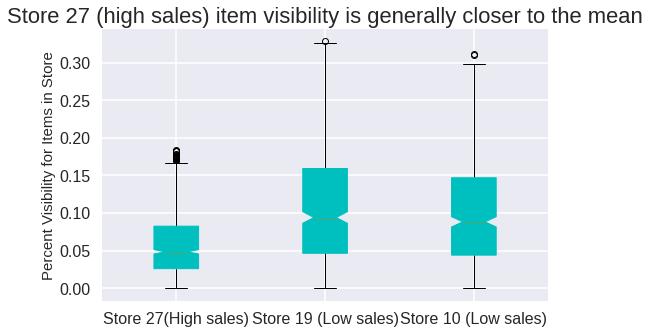

In [187]:
#boxplot to attempt to show the same data as the previous chart more accessibly
df_27 = df[df['Outlet_Identifier'] == 'OUT027']
df_19 = df[df['Outlet_Identifier'] ==  'OUT019']
df_10 = df[df['Outlet_Identifier'] == 'OUT010']
df_visibility_by_item27 = df_27.groupby('Item_Identifier')['Item_Visibility'].sum().reset_index(name = 'Item Visibility')
df_visibility_by_item19 = df_19.groupby('Item_Identifier')['Item_Visibility'].sum().reset_index(name = 'Item Visibility')
df_visibility_by_item10 = df_10.groupby('Item_Identifier')['Item_Visibility'].sum().reset_index(name = 'Item Visibility')
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5));
boxplot = axes.boxplot([df_visibility_by_item27['Item Visibility'], df_visibility_by_item19['Item Visibility'], df_visibility_by_item10['Item Visibility']],
                                  labels=['Store 27(High sales)', 'Store 19 (Low sales)', 'Store 10 (Low sales)'],
                                    notch = True,
                                    patch_artist = True,
                                    boxprops=dict(facecolor='c', color='c'));
plt.ylabel('Percent Visibility for Items in Store', fontsize = 15);
plt.title('Store 27 (high sales) item visibility is generally closer to the mean', fontsize = 22);

In [188]:
#dummy encoding potentially important columns
df = pd.get_dummies(df, columns =['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first = True)
#deleting likely unnecessary columns that will just add unnecessary rows 
del df['Outlet_Identifier']
del df['Item_Identifier']

In [189]:
#Assign the "Item_Outlet_Sales" column as the target and the rest of the variables as the features matrix.  
y = df['Item_Outlet_Sales']
X =df.drop(columns = ['Item_Outlet_Sales'])

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)



In [191]:
#Now that I dropped some columns instead of dummy encoding the model works much better.
#It's still not a great model, but it's not horrendous and the r^2 for train and test are close
reg = LinearRegression()
reg.fit(X_train,y_train)
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)
train_score = reg.score(X_train, y_train)
print(train_score)
test_score = reg.score(X_test, y_test)
print(test_score)

0.5615551419174628
0.5671041872384911


In [192]:
#r^2
reg.score(X, y)

0.5632415249149648

In [193]:
#This shows now that the rmse is $1092 for the target 'Item_Outlet_Sales', which isn't great but is at least in the correct range.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)
print(rmse)
print(mse)


1092.8630817241497
1194349.7153956052


In [194]:
#Build and evaluate a simple decision tree model.
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)
dt_train_preds = dt.predict(X_train)
dt_test_preds = dt.predict(X_test)
dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)
print(dt_train_score)
print(dt_test_score)

1.0
0.1489224270508337


In its default state, this model performs very poorly on the test set

In [195]:
#from this we can see that max r^2 is at a depth of 5
max_depth_range = list(range(2, 36)) 

r2 = []
for depth in max_depth_range:
    dt = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    r2.append(score)

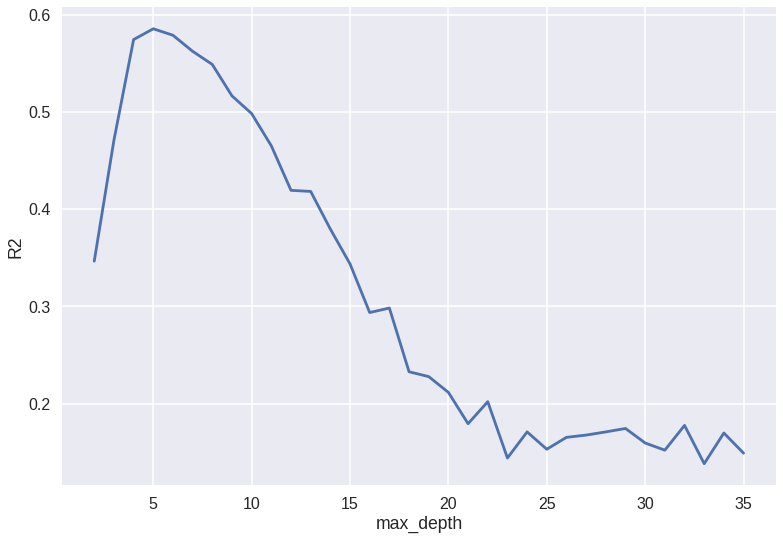

In [196]:
#Graph for ideal max depth for decision tree
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [197]:
#Decision Tree maximized; it's just slightly better than the linear regression
dt5 = DecisionTreeRegressor(max_depth = 5, min_samples_split = 150, random_state = 42)
dt5.fit(X_train, y_train)
dt_5_train_preds = dt5.predict(X_train)
dt_5_test_preds = dt5.predict(X_test)
train_5_score = dt5.score(X_train, y_train)
test_5_score = dt5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6062041953014426
0.5969322651959093


In [198]:
#Decision Trees RMSE
mse = mean_squared_error(y_test, dt_5_test_preds)
rmse_dt = np.sqrt(mse)
print(rmse_dt)
print(mse)

1054.5400541336314
1112054.7257721622


In [199]:
#Build and evaluate a bagged tree model.
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor( n_estimators = 200, max_features = 28, max_samples = 1000, random_state = 42)
br.fit(X_train, y_train)
#br.fit(X_test, y_test)
br_train_preds = br.predict(X_train)
br_test_preds = br.predict(X_test)
br_train_score = br.score(X_train, y_train)
br_test_score = br.score(X_test, y_test)
print(br_train_score)
print(br_test_score)


0.7000828109944092
0.5919805439517654


In [200]:
#Bagged Trees RMSE
mse = mean_squared_error(y_test, br_test_preds)
rmse_br = np.sqrt(mse)
print(rmse_br)
print(mse)

1060.997837990401
1125716.412220305


In [201]:
#Build and evaluate a random forest model.  
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9369431778330065
0.5460112806782202


In [202]:
#Tuning hyperparameters
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf_200.fit(X_train, y_train)
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9385441459592072
0.5475221192760168


In [203]:
max_depth_range_forest = list(range(2, 36)) 

r2 = []
for depth in max_depth_range_forest:
    rf = RandomForestRegressor(max_depth = depth, 
                             random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)

    r2.append(score)

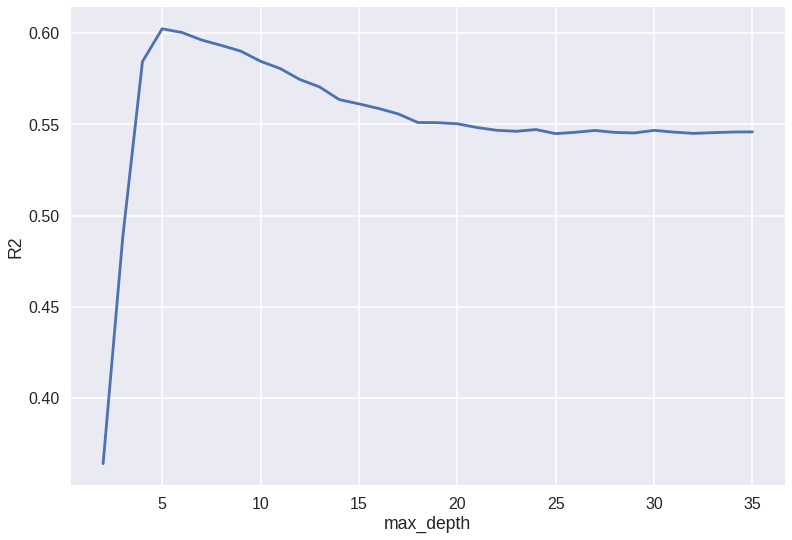

In [204]:
#Plot for depth for random forests model
plt.plot(max_depth_range_forest, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [205]:
#Makes a much better model for the Random Forest 
rf = RandomForestRegressor(max_depth = 5, n_estimators = 100, max_features = 25, min_samples_leaf = 4, random_state = 42)
rf.fit(X_train, y_train)
#rf.fit(X_test, y_test)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.6174972908799796
0.6063736173412098


In [206]:
#Random Forest RMSE
mse = mean_squared_error(y_test, rf_test_preds)
rmse_rf = np.sqrt(mse)
print(rmse_rf)
print(mse)

1042.1162361450347
1086006.2496370936


In [209]:
importance = rf.feature_importances_
importance

array([7.07905849e-04, 6.62097229e-03, 5.48339858e-01, 4.65901903e-02,
       3.74627268e-04, 7.32168387e-05, 2.91458298e-05, 5.93724680e-05,
       1.87674544e-04, 2.25521561e-04, 9.59403303e-04, 7.69932077e-05,
       1.52884315e-04, 4.11836278e-04, 2.32901390e-04, 0.00000000e+00,
       0.00000000e+00, 2.72216631e-04, 3.09286941e-04, 2.24649831e-04,
       3.46565214e-02, 3.05392660e-05, 2.87086171e-03, 0.00000000e+00,
       4.74731074e-05, 1.52133972e-01, 3.18927594e-02, 1.72519216e-01])

In [211]:
#From this we can see that the most important feature in the random forest model is Item_MRP
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_Regular         8523 non-null   uint8  
 6   Item_Type_Breads                 8523 non-null   uint8  
 7   Item_Type_Breakfast              8523 non-null   uint8  
 8   Item_Type_Canned                 8523 non-null   uint8  
 9   Item_Type_Dairy                  8523 non-null   uint8  
 10  Item_Type_Frozen Foods           8523 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 12  Item_Type_Hard Drink

Compare the performance of your models based on r^2.

In [207]:
# doing dt5.score(X,y) for some reason gives me a different (and generally better) r^2 on each of these models and I"m not sure why
print(reg.score(X_test,y_test))
print(dt5.score(X_test,y_test))
print(br.score(X_test,y_test))
print(rf.score(X_test,y_test))

0.5671041872384911
0.5969322651959093
0.5919805439517654
0.6063736173412098


r^2 for the random forest model is the best by a very small margin, and linear regression is by far the worst. 

Compare the performance of your models based on rmse.  


In [208]:
#Compare the performance of your models based on rmse.  
print("Linear Regression:", rmse)
print("Decision Tree:", rmse_dt)
print("Bagged Trees:", rmse_br)
print("Random Forest:", rmse_rf)



Linear Regression: 1092.8630817241497
Decision Tree: 1054.5400541336314
Bagged Trees: 1060.997837990401
Random Forest: 1042.1162361450347


The Best RMSE comes from the Random Forest, but all four RMSE scores are fairly close to one another.

Overall I recommened the random forests model, as it has the lowest RMSE and the hghest r^2. The decision tree model and the bagged trees models are just slightly less efficient models that perform similarly to the random forest model, but the random forests is better.